# Assignment 3: Building Neural Networks and CNN
## Part 1: Building a Basic NN [20 points]

In [452]:
# importing pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [453]:
# read csv file into data frame
df = pd.read_csv('income_dataset.csv') 

In [454]:
# describe function on dataset
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [455]:
# head function on dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [456]:
df.rename(columns={'marital.status': 'marital_status', 'native.country': 'native_country', 'hours.per.week': 'hours_per_week'}, inplace=True)

In [457]:
# head function on dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,capital.gain,capital.loss,hours_per_week,native_country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [458]:
# mean function on dataset
df.mean()

/var/folders/f6/_vngcq595z16gs5ggwbgv0rh0000gn/T/ipykernel_55299/3488411937.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age                   38.581647
fnlwgt            189780.114312
education.num         10.080679
capital.gain        1077.648844
capital.loss          87.303830
hours_per_week        40.437456
dtype: float64

In [459]:
# columns function on dataset
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital_status', 'occupation', 'relationship', 'capital.gain',
       'capital.loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [460]:
# info function on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32560 non-null  float64
 3   education       32561 non-null  object 
 4   education.num   32561 non-null  int64  
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   capital.gain    32561 non-null  int64  
 9   capital.loss    32561 non-null  int64  
 10  hours_per_week  32561 non-null  int64  
 11  native_country  32561 non-null  object 
 12  income          32561 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 3.2+ MB


In [461]:
df[df=='?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital_status       0
occupation        1843
relationship         0
capital.gain         0
capital.loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [462]:
for i in df.columns:
    df = df[~df[i].isin(['?'])]
df.dropna(inplace=True)

In [463]:
df.shape

(30162, 13)

In [464]:
# calculate the sum of missing entries in the dataset
df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital_status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [465]:
# convert columns with datatype object to data type categorical
df['workclass'] = df.workclass.astype('category')
df['education'] = df.education.astype('category')
df['marital_status'] = df.marital_status.astype('category')
df['occupation'] = df.occupation.astype('category')
df['relationship'] = df.relationship.astype('category')
df['native_country'] = df.native_country.astype('category')
df['income'] = df.income.astype('category')
print(df.dtypes)



age                  int64
workclass         category
fnlwgt             float64
education         category
education.num        int64
marital_status    category
occupation        category
relationship      category
capital.gain         int64
capital.loss         int64
hours_per_week       int64
native_country    category
income            category
dtype: object


In [466]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df[['marital_status']]) 

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [467]:
ohe.categories_

[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object)]

In [468]:
from sklearn.preprocessing import LabelEncoder

<AxesSubplot:>

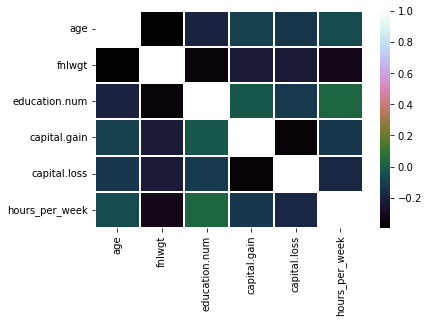

In [469]:
import seaborn as sns
income = df.corr()

sns.heatmap(income.corr(), linewidths=2, cmap='cubehelix')

In [470]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours_per_week
age,1.000000,-0.076456,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076456,1.000000,-0.044999,0.000419,-0.009573,-0.022918
education.num,0.043526,-0.044999,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.000419,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,-0.009573,0.079646,-0.032229,1.000000,0.052417
hours_per_week,0.101599,-0.022918,0.152522,0.080432,0.052417,1.000000


<AxesSubplot:xlabel='marital_status', ylabel='age'>

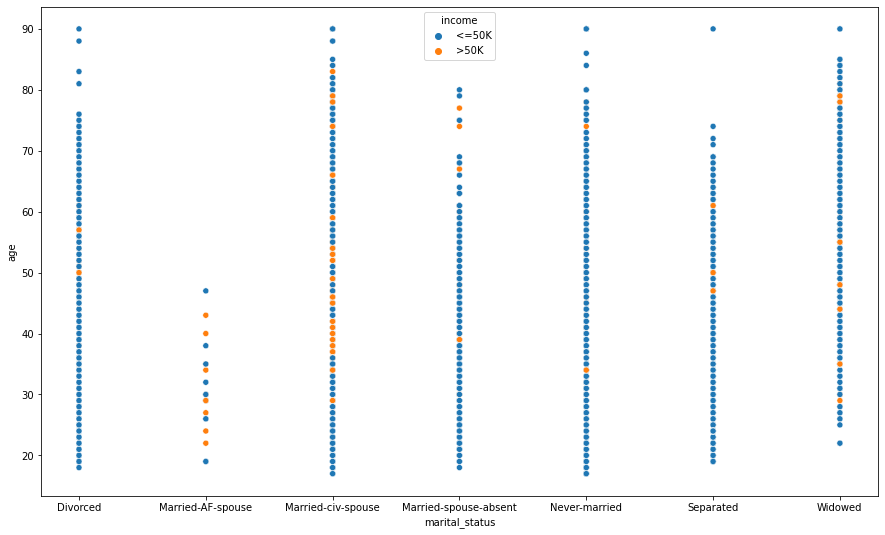

In [471]:
plt.figure(figsize=(15,9))
sns.scatterplot(data =df, x='marital_status', y='age', hue='income')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education.num'}>,
        <AxesSubplot:title={'center':'capital.gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>]], dtype=object)

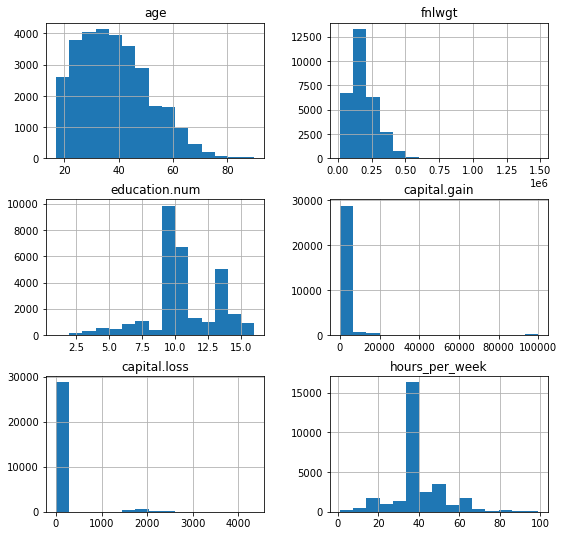

In [472]:
numerical = ['age', 'fnlwgt','education.num', 'capital.gain', 'capital.loss', 'hours_per_week']
df[numerical].hist(bins=15, figsize=(9, 9), layout=(3,2))

In [473]:
Y = df.iloc[:,12:13].values
print(Y)

[['<=50K']
 ['<=50K']
 ['<=50K']
 ...
 ['>50K']
 ['<=50K']
 ['<=50K']]


In [474]:
only_category = df.select_dtypes('category').columns

temp_df = pd.DataFrame()

for colummn in only_category:
    one_hot = pd.get_dummies(df[colummn])                
    unique_values = df[colummn].unique()
    for values in unique_values[1:]:        
        temp_df[values] = one_hot[values]

df = df.select_dtypes(exclude=['category'])
df = df.join(temp_df)

X = df.iloc[:,:92].values
print(X.shape)


(30162, 92)


In [475]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()
print(Y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [476]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
min_max_scaler = MinMaxScaler()
sc = StandardScaler()
X = min_max_scaler.fit_transform(X)

In [477]:
model = Sequential()
model.add(Dense(48, input_dim=92, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 48)                4464      
                                                                 
 dense_13 (Dense)            (None, 12)                588       
                                                                 
 dense_14 (Dense)            (None, 2)                 26        
                                                                 
Total params: 5,078
Trainable params: 5,078
Non-trainable params: 0
_________________________________________________________________


In [478]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(24129, 92)
(6033, 92)
(24129, 2)
(6033, 2)


In [479]:
model.fit(X_train, Y_train,
          batch_size=64, epochs=50,
          validation_data=(X_test, Y_test))

Epoch 1/50
378/378 [==============================] - 1s 3ms/step - loss: 0.1676 - accuracy: 0.9403 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 2/50
378/378 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 9.4135e-04 - val_accuracy: 1.0000
Epoch 3/50
378/378 [==============================] - 1s 2ms/step - loss: 5.8536e-04 - accuracy: 1.0000 - val_loss: 3.5801e-04 - val_accuracy: 1.0000
Epoch 4/50
378/378 [==============================] - 1s 2ms/step - loss: 2.5704e-04 - accuracy: 1.0000 - val_loss: 1.8336e-04 - val_accuracy: 1.0000
Epoch 5/50
378/378 [==============================] - 1s 2ms/step - loss: 1.4053e-04 - accuracy: 1.0000 - val_loss: 1.0822e-04 - val_accuracy: 1.0000
Epoch 6/50
378/378 [==============================] - 1s 2ms/step - loss: 8.6340e-05 - accuracy: 1.0000 - val_loss: 6.9531e-05 - val_accuracy: 1.0000
Epoch 7/50
378/378 [==============================] - 1s 2ms/step - loss: 5.6903e-05 - accuracy: 1.0000 - val_lo

KeyboardInterrupt: 

In [ ]:
# Step 5: Choose your target Y - We will be using a simple NN to predict income of a person (over/under $50k). In this case, the column 'income' 
# can be used as Y(target)

# Step 6: Create the data matrices for X (input) and Y (target) in a shape X = Nxd and Y = Nx1, where N is a number of data samples and d is a number of features

#df = df.sample(frac=1) # shuffles data to avoid bias or variance

#Y = (df['income'])
#print(Y.shape)

#X = df.drop(columns=['income'])




#X.shape

In [ ]:
#from sklearn.compose import make_column_transformer

In [ ]:
#column_trans = make_column_transformer(
 #   (OneHotEncoder(), ['workclass','education']),
 ##   remainder='passthrough'
#)

In [ ]:
#column_trans.fit_transform(X)


In [ ]:
#from sklearn.pipeline import make_pipeline

In [ ]:
#pipe = make_pipeline()

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
#import tensorflow as tf
#from sklearn.model_selection import train_test_split

#train_samples, test_samples, train_labels, test_labels = train_test_split(X,Y)
#print('train samples shape: ', train_samples.shape, '\ntest samples shape: ', test_samples.shape, '\ntrain labels shape: ', train_labels.shape, '\ntest labels shape: ', test_labels.shape)


In [ ]:
#for i in train_samples:
   # print(i)

In [ ]:
#for i in train_labels:
   # print(i)

In [ ]:
#train_labels = np.array(train_labels)
#train_samples = np.array(train_samples)
#train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
#model = Sequential([
   # Dense(units=16, input_shape=(14,), activation='relu'),
   # Dense(units=32, activation='relu'),
   # Dense(units=2, activation='softmax')
#])

In [ ]:
#model.summary()

In [ ]:
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#model.fit(x=train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2) 